In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sqlite3
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow import keras
from sklearn.kernel_ridge import KernelRidge
import pickle
from sklearn.decomposition import PCA

In [2]:
database = "data.sqlite"

conn = sqlite3.connect(database)

train_df = pd.read_sql("select * from new_table_name", con=conn)
train_df.head()

,Unnamed: 0,year,make,model,final_price,mileage,engine,zipcode,engine string
0,1,1997,Chevrolet,Chevrolet Suburban,17000.0,67000,5700.0,60069,5.7L Vortec V8
1,2,1990,Porsche,Porsche 964 911,225000.0,1000,3800.0,84790,3.8-Liter Flat-Six
2,3,2003,Toyota,Toyota Pickup,24750.0,116000,3400.0,90027,3.4-Liter DOHC V6
3,5,1992,Volkswagen,Volkswagen Golf/Rabbit Cabriolet,10750.0,100000,1800.0,98208,1.8-Liter Inline-Four
4,6,2008,Toyota,Toyota FJ Cruiser,32500.0,9000,4000.0,57108,4.0-Liter V6


In [3]:
conn.close()

In [4]:
train_df['final_price']=(train_df['final_price'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

In [5]:
train_df = train_df.drop(['model', 'engine string', 'Unnamed: 0', 'zipcode'], axis='columns')
train_df

,year,make,final_price,mileage,engine
0,1997,Chevrolet,17000.0,67000,5700.000
1,1990,Porsche,225000.0,1000,3800.000
2,2003,Toyota,24750.0,116000,3400.000
3,1992,Volkswagen,10750.0,100000,1800.000
4,2008,Toyota,32500.0,9000,4000.000
...,...,...,...,...,...
6995,2009,Ford,115500.0,235000,5424.097
6996,1983,Jeep,39962.0,24000,4200.000
6997,1997,Ford,24900.0,75000,7300.000
6998,2005,Ford,17750.0,22000,3900.000


In [6]:
train_df.make.value_counts()

Porsche          1103
BMW               785
Chevrolet         782
Mercedes-Benz     732
Ford              691
                 ... 
Alpine              1
Nash                1
Bricklin            1
Opel                1
Renault             1
Name: make, Length: 68, dtype: int64

In [7]:
train_df1 = train_df.apply(lambda x: x.mask(x.map(x.value_counts())<100, 'other') if x.name=='make' else x)
train_df1.make.value_counts()

other            1528
Porsche          1103
BMW               785
Chevrolet         782
Mercedes-Benz     732
Ford              691
Toyota            313
Land Rover        173
Volkswagen        168
Jaguar            162
Jeep              161
Honda             148
Ferrari           145
Pontiac           109
Name: make, dtype: int64

In [8]:
#train_df1 = train_df1.query('make != "other"')
#train_df1.make.value_counts()

In [9]:
# Convert categorical data to numeric and separate target feature for training data
train_df2 = pd.get_dummies(train_df1)
train_df2.head()

,year,final_price,mileage,engine,make_BMW,make_Chevrolet,make_Ferrari,make_Ford,make_Honda,make_Jaguar,make_Jeep,make_Land Rover,make_Mercedes-Benz,make_Pontiac,make_Porsche,make_Toyota,make_Volkswagen,make_other
0,1997,17000.0,67000,5700.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1990,225000.0,1000,3800.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2003,24750.0,116000,3400.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1992,10750.0,100000,1800.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2008,32500.0,9000,4000.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
train_X = train_df2.drop(columns='final_price')
train_y = train_df2['final_price']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, random_state=42)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
#pca = PCA(n_components = .7, svd_solver='full')
#X_train_scaled = pca.fit_transform(X_train_scaled)
#X_test_scaled = pca.fit_transform(X_test_scaled)

In [14]:
#X_train_scaled[0]

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print(f'Model Score: {model.score(X_train_scaled, y_train)}')
print(f'Model Score: {model.score(X_test_scaled, y_test)}')

Model Score: 0.1871078659464892
Model Score: 0.19075679060654038


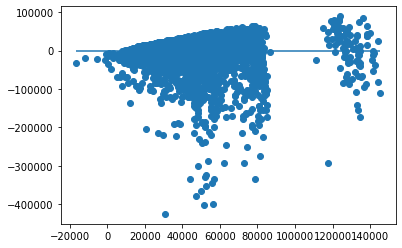

In [16]:
predictions = model.predict(X_train_scaled)
# Plot Residuals
plt.scatter(predictions, predictions - y_train)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [17]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
print(f"True output: {train_y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y_train[0]}")

x_min = X_train_scaled.min()
x_max = X_train_scaled.max()
y_min_actual = y_train.min()
y_max_actual = y_train.max()

y_min = 101.896225057 + (model.coef_ * x_min)
y_max = 101.896225057 + (model.coef_ * x_max)
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

# y_min_predicted = model.predict([[x_min]])
# y_max_predicted = model.predict([[x_max]])
# print(f"Actual Min Value: {y_min_actual}")
# print(f"Predicted Min Value: {y_min_predicted}")
# print(f"Actual Max Value: {y_max_actual}")
# print(f"Predicted Max Value: {y_max_predicted}")

# plt.scatter(X, y, c='blue')
# plt.plot([x_min, x_max], [y_min, y_max], c='red')

Weight coefficients:  [ 2345.84312497 -6448.33704443  7955.23657887 -2924.71790412
 -3079.68107037 10898.39904769 -2583.13063115 -2058.66430349
  1318.01685687 -3063.4069118   -650.18611222 -2716.03201152
 -2251.25912576 10535.38432998  -743.98850917  -964.15138998
 -1656.56210124]
y-axis intercept:  46027.88152380952
True output: 17000.0
Predicted output: 54414.3396533634
Prediction Error: 37414.3396533634
Actual Min Value: 5001.0
Calculated Min Value: [ -8360.84252437  23364.57359444 -28596.99166744  10652.95280463
  11211.98967194 -39214.58787654   9420.66074702   7528.62394943
  -4652.91120785  11153.27988402   2447.47302328   9900.1086903
   8223.41877522 -37904.99531021   2785.86955587   3580.11744177
   6078.02145517]
Actual Max Value: 456000.0
Calculated Max Value: [ 19203.98779703 -52406.61271946  64881.01806356 -23713.94577738
 -24975.80364014  88847.05329942 -20932.41648469 -16661.71154681
  10834.4462517  -24843.28392303  -5192.53907721 -22014.62625006
 -18230.00223603  858

In [18]:
reg = Lasso(max_iter=10000).fit(X_train_scaled, y_train)
print(f'Train score: {reg.score(X_train_scaled, y_train)}')
print(f'Test Score: {reg.score(X_test_scaled, y_test)}')

Train score: 0.18710785703974975
Test Score: 0.19075964334168272


C:\Users\austi\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1627116875.9433594, tolerance: 1167689835.442431
  model = cd_fast.enet_coordinate_descent(


In [19]:
reg = Ridge(alpha=100).fit(X_train_scaled, y_train)
print(f'Train score: {reg.score(X_train_scaled, y_train)}')
print(f'Test Score: {reg.score(X_test_scaled, y_test)}')

Train score: 0.1870354854086308
Test Score: 0.19052653081503468


In [20]:
reg = ElasticNet(alpha=10).fit(X_train_scaled, y_train)
print(f'Train score: {reg.score(X_train_scaled, y_train)}')
print(f'Test Score: {reg.score(X_test_scaled, y_test)}')

Train score: 0.06319884738040549
Test Score: 0.06319746693197659


In [21]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}')
    plt.show()
    y_pred = reg.predict(X_test_scaled)
    print(mean_absolute_error(y_test, y_pred))    
    print(mean_squared_error(y_test, y_pred)) 
    print(np.median(abs(y_test - y_pred)))
    print('\n')
    return [
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        np.median(abs(y_test - y_pred)),
        y_pred,
        reg]


In [22]:
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [23]:
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)
test_model(GradientBoostingRegressor(), data)
test_model(SGDRegressor(), data)
test_model(KernelRidge(), data)
test_model(BayesianRidge(), data)

Model: KNeighborsRegressor
Train score: 0.6280663885287097
Test Score: 0.384462354292179
19360.708342857142
1415707606.6670628
9776.0


Model: RandomForestRegressor
Train score: 0.9246360191508673
Test Score: 0.47530862431035215
17686.61953520635
1206765462.5124774
9200.44


Model: ExtraTreesRegressor
Train score: 0.9943194395002133
Test Score: 0.49651947122202855
17265.483067619047
1157981513.1860628
8728.354999999996


Model: AdaBoostRegressor
Train score: 0.08091815161308846
Test Score: 0.04646273518377886
32636.29476255387
2193090818.1716714
23918.74033149171


Model: SVR
Train score: -0.1128191395869853
Test Score: -0.10426113870596976
27036.75895635068
2539748632.295571
14374.605124445721


Model: GradientBoostingRegressor
Train score: 0.4807164316628737
Test Score: 0.44209678876703407
19686.44860167013
1283151120.7056227
12560.677607564849


Model: SGDRegressor
Train score: 0.18462034794846383
Test Score: 0.19316047477391396
26299.754277533502
1855692923.3933582
19206.5804062954

[26032.950726622777,
 1861588211.704796,
 18338.20126821688,
 array([25832.52784891, 46771.41332934, 37660.43740975, ...,
        64616.85754417, 31967.64435528, 33319.65970014]),
 BayesianRidge()]

In [24]:
mse_list = []
mae_list = []
median_list = []
for i in range(5,30):
    for j in range(10, 1001, 10):
        val1, val2, val3, ypred, model = test_model(RandomForestRegressor(max_depth = i, n_estimators = j, n_jobs = -1, random_state=12), data)
        mse_list.append(val2)
        mae_list.append(val1)
        median_list.append(val3)
    

Model: RandomForestRegressor
Train score: 0.3927845154259746
Test Score: 0.35788033331020574
21777.147294054474
1476845003.4894598
15056.090387472177


Model: RandomForestRegressor
Train score: 0.39242927615246226
Test Score: 0.358185107855473
21813.426325074706
1476144036.3836102
14775.19917853945


Model: RandomForestRegressor
Train score: 0.3939856849667749
Test Score: 0.3589618808413697
21868.325446276955
1474357495.0851932
15015.641475843164


Model: RandomForestRegressor
Train score: 0.39572957576857437
Test Score: 0.3612470355313335
21802.0443507964
1469101746.8794553
14985.733648062866


Model: RandomForestRegressor
Train score: 0.3970025769941643
Test Score: 0.36269015814714367
21779.699345561265
1465782632.8028398
14990.560607758023


Model: RandomForestRegressor
Train score: 0.39676711744672255
Test Score: 0.3602583226615689
21852.59723955945
1471375739.933001
15064.648842181658


Model: RandomForestRegressor
Train score: 0.3967434427069596
Test Score: 0.3596694444666201
218

KeyboardInterrupt: 

In [32]:
val1, val2, val3, ypred1, model = test_model(ExtraTreesRegressor(max_depth = 19, n_estimators = 30, n_jobs = -1, random_state=12), data)
y_train_pred1 = model.predict(X_train_scaled)
y_train_pred1

Model: ExtraTreesRegressor
Train score: 0.9762532400859892
Test Score: 0.49999107233005213
16951.671624611543
1149996994.0746589
8577.387154818865




array([ 69790.67370231, 174326.36130952,  88950.68527537, ...,
        39525.43935185,  16490.27777778,  35004.03119845])

In [365]:
val1, val2, val3, ypred2, model2 = test_model(RandomForestRegressor(max_depth = 14, n_estimators = 15, n_jobs = -1, random_state=12), data)
y_train_pred2 = model2.predict(X_train_scaled)
y_train_pred2

Model: RandomForestRegressor
Train score: 0.8667658453496476
Test Score: 0.31090086291147856
19716.06561061078
2966289197.249835
8733.248887866965




array([31091.25395315, 31078.41296296, 54163.17359287, ...,
       27478.36908928, 22366.32779146, 80118.27155844])

In [366]:
ypred = (ypred1 + ypred2)/2
print(mean_absolute_error(y_test, ypred))    
print(mean_squared_error(y_test, ypred)) 
print(np.median(abs(y_test - ypred)))

18483.080015972097
2531896079.775616
8354.4532503546


In [367]:
ypred_geo = (ypred1 * ypred2) ** (1/2)
print(mean_absolute_error(y_test, ypred_geo))    
print(mean_squared_error(y_test, ypred_geo)) 
print(np.median(abs(y_test - ypred_geo)))

18387.126078794576
2618950168.6052322
8318.465980455956


In [297]:
y_train_pred = [y_train_pred1, y_train_pred2]

In [33]:
filename='Regressor_model.h5'
pickle.dump(model, open(filename, 'wb'))

In [264]:
filename='Regressor_model2.h5'
pickle.dump(model2, open(filename, 'wb'))

In [185]:
model2 = pickle.load(open(filename, 'rb'))
model2

ExtraTreesRegressor(max_depth=21, n_estimators=37, n_jobs=-1, random_state=12)

In [246]:
print(min(mae_list))
print(min(mse_list))
print(min(median_list))

17640.247114293583
1154056169.9934208
7882.603329108697


In [247]:
print(mae_list.index(17640.247114293583))
print(mse_list.index(1154056169.9934208))
print(median_list.index(7882.603329108697))

907
902
1100


In [248]:
print(mae_list[907])
print(mse_list[907])
print(median_list[907])

17640.247114293583
1167380442.2911031
8227.162527883453


AttributeError: 'list' object has no attribute 'shape'

In [317]:
X_test_price1 = pd.DataFrame(data=ypred1)
X_train_price1 = pd.DataFrame(data=y_train_pred1)
X_test_price1

,0
0,29624.714500
1,23580.253205
2,19688.299360
3,27549.826223
4,27178.731188
...,...
1385,66308.581725
1386,89865.783784
1387,58669.027027
1388,26093.942321


In [318]:
X_test_price2 = pd.DataFrame(data=ypred2)
X_train_price2 = pd.DataFrame(data=y_train_pred2)

In [319]:
X_test_price3 = pd.concat([X_test_price1, X_test_price2], axis=1)
X_train_price3 = pd.concat([X_train_price1, X_train_price2], axis=1)

In [320]:
X_test_scaled_df = pd.DataFrame(data=X_test_scaled)
X_train_scaled_df = pd.DataFrame(data=X_train_scaled)

In [321]:
X_test_price = pd.concat([X_test_price3, X_test_scaled_df], axis=1)
X_train_price = pd.concat([X_train_price3, X_train_scaled_df], axis=1)

X_train_price.shape

(4168, 18)

In [337]:
data2 = [X_train_price, X_test_price, y_train, y_test]

In [338]:
mse_list = []
mae_list = []
median_list = []
for i in range(5,30):
    for j in range(10, 1001, 10):
        val1, val2, val3, ypred, model = test_model(RandomForestRegressor(max_depth = i, n_estimators = j, n_jobs = -1, random_state=12), data2)
        mse_list.append(val2)
        mae_list.append(val1)
        median_list.append(val3)

Model: RandomForestRegressor
Train score: 0.9869005422480864
Test Score: 0.5681275603331808
17441.072024456553
1132276326.9546764
7849.58623079961


Model: RandomForestRegressor
Train score: 0.9881963929526026
Test Score: 0.5691954549060614
17434.934448286713
1129476537.8653595
7771.6068305517


Model: RandomForestRegressor
Train score: 0.9875213627443427
Test Score: 0.5656383262981348
17471.781766008327
1138802561.3499694
7774.167934742105


Model: RandomForestRegressor
Train score: 0.9879446019468496
Test Score: 0.5654468527165531
17480.71261796157
1139304563.7556548
7806.698541310932


Model: RandomForestRegressor
Train score: 0.9879338360019947
Test Score: 0.5659764074038047
17474.001540121924
1137916185.6580265
7818.676837692992


Model: RandomForestRegressor
Train score: 0.9881491811370824
Test Score: 0.5665274482489747
17468.937583419407
1136471475.4916346
7792.343874083046


Model: RandomForestRegressor
Train score: 0.9881184744169275
Test Score: 0.5670004522823816
17461.143817

17450.627417643027
1134271169.5761502
7706.826279643061


Model: RandomForestRegressor
Train score: 0.9874923921279322
Test Score: 0.5672647578625811
17451.971042795274
1134538408.8162832
7716.015101616802


Model: RandomForestRegressor
Train score: 0.9874827674762403
Test Score: 0.5672661999668007
17451.913564926792
1134534627.9302647
7726.851733570618


Model: RandomForestRegressor
Train score: 0.9875226458360233
Test Score: 0.5671891507365094
17452.863617679617
1134736634.3827634
7721.834267835033


Model: RandomForestRegressor
Train score: 0.9875250477677929
Test Score: 0.5672170096760139
17452.867434093223
1134663594.2561014
7718.87822722141


Model: RandomForestRegressor
Train score: 0.9875115002351919
Test Score: 0.567176279378155
17453.492062470697
1134770380.3063788
7724.7590082568295


Model: RandomForestRegressor
Train score: 0.9875180194932527
Test Score: 0.5671132459873087
17454.372641400365
1134935640.252852
7729.547124735413


Model: RandomForestRegressor
Train score: 0.

Model: RandomForestRegressor
Train score: 0.9882499298225883
Test Score: 0.5664936738978533
17482.35494897055
1136560024.5508487
7864.410993860121


Model: RandomForestRegressor
Train score: 0.988239740161216
Test Score: 0.5664978931039828
17480.04958255849
1136548962.7029972
7769.709006712434


Model: RandomForestRegressor
Train score: 0.988239274706152
Test Score: 0.566407427025065
17479.600541706153
1136786145.2368724
7808.243383796806


Model: RandomForestRegressor
Train score: 0.9882333091692627
Test Score: 0.5665462758355783
17481.21798407479
1136422113.6230667
7798.116714274325


Model: RandomForestRegressor
Train score: 0.9881790807427513
Test Score: 0.5668028632277466
17480.56871999269
1135749396.8593588
7833.202321208661


Model: RandomForestRegressor
Train score: 0.9881798077775092
Test Score: 0.5668072991501536
17479.7940012448
1135737766.8282006
7815.29347119152


Model: RandomForestRegressor
Train score: 0.9882074390602071
Test Score: 0.5668821285616025
17478.99775281123


Model: RandomForestRegressor
Train score: 0.988106006203682
Test Score: 0.5656190216772037
17490.38095596562
1138853173.8995867
7778.6267614390235


Model: RandomForestRegressor
Train score: 0.9880945266223162
Test Score: 0.5655788796550074
17490.08910754024
1138958417.6180422
7747.719974109312


Model: RandomForestRegressor
Train score: 0.9881030388023152
Test Score: 0.5656083663199973
17489.789994574905
1138881109.9464653
7745.323254807034


Model: RandomForestRegressor
Train score: 0.9881019177559742
Test Score: 0.5657083803408511
17488.645081921833
1138618894.76954
7751.092036082024


Model: RandomForestRegressor
Train score: 0.9880858267607889
Test Score: 0.56575394864109
17487.662216173285
1138499424.521196
7750.893994318321


Model: RandomForestRegressor
Train score: 0.9881017313532394
Test Score: 0.5657669004784442
17487.568557426614
1138465467.5990126
7762.626560206665


Model: RandomForestRegressor
Train score: 0.988120408548475
Test Score: 0.5657928210128086
17487.1549808170

Model: RandomForestRegressor
Train score: 0.9887671129558803
Test Score: 0.5644165560228136
17585.58636919708
1142005779.3205125
7916.603420184298


Model: RandomForestRegressor
Train score: 0.9886368237009118
Test Score: 0.5642970086437218
17586.50707964135
1142319206.7469058
7902.026261302359


Model: RandomForestRegressor
Train score: 0.9886618346220721
Test Score: 0.5642398494305063
17587.20830357131
1142469065.86744
7919.687427440145


Model: RandomForestRegressor
Train score: 0.9886398228417718
Test Score: 0.5643656433723226
17586.41428795438
1142139261.301761
7909.617686962702


Model: RandomForestRegressor
Train score: 0.9885895941625203
Test Score: 0.5641667534222381
17588.70895437747
1142660707.8250067
7916.847474919197


Model: RandomForestRegressor
Train score: 0.988667524475187
Test Score: 0.5641593544931969
17590.186436180637
1142680106.2200625
7929.587001346486


Model: RandomForestRegressor
Train score: 0.98858024128808
Test Score: 0.5641423064542608
17588.38865569579
1

Test Score: 0.5632103378637263
17594.12385965932
1145168222.998861
7942.817962287039


Model: RandomForestRegressor
Train score: 0.9886123727103107
Test Score: 0.5632459144020201
17593.876057826164
1145074948.9938421
7938.74375962277


Model: RandomForestRegressor
Train score: 0.9886303377125957
Test Score: 0.563151816472601
17593.982186922396
1145321653.4558794
7919.725133631184


Model: RandomForestRegressor
Train score: 0.988655416951782
Test Score: 0.56316854735658
17593.74284982857
1145277788.6890674
7923.184799610361


Model: RandomForestRegressor
Train score: 0.9886738471821422
Test Score: 0.5631925325007757
17593.4301883764
1145214904.8176346
7920.459145135447


Model: RandomForestRegressor
Train score: 0.9886747597250717
Test Score: 0.5632269513172943
17593.15564995149
1145124666.1092422
7919.271126461659


Model: RandomForestRegressor
Train score: 0.9886932359156423
Test Score: 0.563248772581454
17593.3758479265
1145067455.4642396
7917.753178359069


Model: RandomForestRegres

Model: RandomForestRegressor
Train score: 0.9890597186436322
Test Score: 0.5622656525085323
17644.69737412551
1147644984.1113143
8011.162259947938


Model: RandomForestRegressor
Train score: 0.9890294132220254
Test Score: 0.5623477842959548
17642.479146282352
1147429652.2909722
7979.067991760694


Model: RandomForestRegressor
Train score: 0.9890380452782005
Test Score: 0.5621478532375295
17643.745744338834
1147953828.3755877
7980.895840546025


Model: RandomForestRegressor
Train score: 0.9890553796833375
Test Score: 0.5620856024032018
17643.74446551478
1148117036.6277673
7982.170699423328


Model: RandomForestRegressor
Train score: 0.9890876317372311
Test Score: 0.5621760923086547
17642.56650813969
1147879791.6258593
8000.147277411856


Model: RandomForestRegressor
Train score: 0.9890611145116439
Test Score: 0.5621618005241004
17642.645263653758
1147917261.6004038
7997.905106131595


Model: RandomForestRegressor
Train score: 0.9890579877379905
Test Score: 0.5622103975205632
17642.04381

Model: RandomForestRegressor
Train score: 0.9890724830383023
Test Score: 0.562895136917025
17633.904573126136
1145994611.8521507
7942.124061869792


Model: RandomForestRegressor
Train score: 0.9890793108344926
Test Score: 0.562825812056684
17635.30136390776
1146176366.673769
7943.882300522724


Model: RandomForestRegressor
Train score: 0.9890687461507504
Test Score: 0.5628317177431947
17635.157978499938
1146160883.2383463
7946.674168530204


Model: RandomForestRegressor
Train score: 0.9890761412686822
Test Score: 0.562790147946018
17636.08028352933
1146269870.2746477
7957.866796471899


Model: RandomForestRegressor
Train score: 0.9890943681828439
Test Score: 0.5628261550871201
17635.19475658044
1146175467.3220012
7959.117355001079


Model: RandomForestRegressor
Train score: 0.9890954112931328
Test Score: 0.5628442327034948
17634.9509761485
1146128071.7135093
7952.870439642626


Model: RandomForestRegressor
Train score: 0.9891168928565541
Test Score: 0.5628917897695016
17634.70018624208

Model: RandomForestRegressor
Train score: 0.9892172732153877
Test Score: 0.5615897321803945
17668.73853340147
1149417101.329649
7977.608550310415


Model: RandomForestRegressor
Train score: 0.9892438618297927
Test Score: 0.561653433958132
17668.45032362506
1149250089.0170023
7971.169376048674


Model: RandomForestRegressor
Train score: 0.9892508367293182
Test Score: 0.5617132978607651
17667.697780367827
1149093138.7845616
7975.374360994076


Model: RandomForestRegressor
Train score: 0.9892409632386673
Test Score: 0.5616201947498436
17668.288199557937
1149337235.0472069
7970.4876397500675


Model: RandomForestRegressor
Train score: 0.989210609264746
Test Score: 0.5616662883881496
17669.314460116362
1149216387.475833
7972.030519562044


Model: RandomForestRegressor
Train score: 0.989217099899955
Test Score: 0.5617249930858617
17669.26691028862
1149062476.4285066
7966.066928110737


Model: RandomForestRegressor
Train score: 0.9891314874701134
Test Score: 0.5617668196918275
17669.390265594

KeyboardInterrupt: 

In [ ]:
mse_list = []
mae_list = []
median_list = []
for i in range(5,30):
    for j in range(10, 1001, 10):
        val1, val2, val3, ypred, model = test_model(ExtraTreesRegressor(max_depth = i, n_estimators = j, n_jobs = -1, random_state=12), data2)
        mse_list.append(val2)
        mae_list.append(val1)
        median_list.append(val3)

In [326]:
#Tests which parameters are best
loss_list = []
mae_list = []
loss_min = 99999999999999999999999999999999999999999999999999999999
mae_min = 99999999999999999999999999999999999999999999999999999999
for i in range(10, 101, 10):
    for j in range(10, 101, 10):
        for k in range(10, 101, 10):
                    nn = tf.keras.models.Sequential()
                    # First hidden layer
                    nn.add(tf.keras.layers.Dense(units=19, activation='selu', input_dim=18))
                    # Second hidden layer
                    nn.add(tf.keras.layers.Dense(units=k, activation='selu'))
                    nn.add(tf.keras.layers.Dense(units=j, activation='selu'))
                    nn.add(tf.keras.layers.Dense(units=i, activation='selu'))
                    # Output layer
                    nn.add(tf.keras.layers.Dense(units=1))
                    # Compile the model
                    nn.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

                    # Train the model
                    fit_model = nn.fit(X_train_price, y_train, epochs=5, verbose=0)
                    model_loss, model_mae = nn.evaluate(X_test_price,y_test,verbose=0)
                    loss_list.append(model_loss)
                    mae_list.append(model_mae)
                    if loss_min > min(loss_list):
                        loss_min = min(loss_list)
                        print(loss_list.index(loss_min))
                        print(f'Loss: {loss_min}')
                        print(f'{k}, {j}, {i}')
                    if mae_min > min(mae_list):
                        mae_min = min(mae_list)
                        print(mae_list.index(mae_min))
                        print(f'MAE: {mae_min}')
                        print(f'{k}, {j}, {i}')

0
Loss: 1134900096.0
10, 10, 10
0
MAE: 17468.87109375
10, 10, 10
1
Loss: 1132404864.0
20, 10, 10
1
MAE: 17404.00390625
20, 10, 10
2
MAE: 17266.31640625
30, 10, 10
3
Loss: 1129400576.0
40, 10, 10
3
MAE: 17138.580078125
40, 10, 10
5
MAE: 17116.943359375
60, 10, 10
7
Loss: 1122630656.0
80, 10, 10
18
MAE: 17055.93359375
90, 20, 10
79
Loss: 1121592960.0
100, 80, 10
79
MAE: 17020.73828125
100, 80, 10
127
Loss: 1121553920.0
80, 30, 20
173
Loss: 1121113600.0
40, 80, 20
188
Loss: 1116379136.0
90, 90, 20
197
MAE: 16975.5859375
80, 100, 20
200
Loss: 1107466240.0
10, 10, 30
633
MAE: 16970.791015625
40, 40, 70


KeyboardInterrupt: 

In [59]:
#min(mae_list)

27250.837890625

In [52]:
#len(mae_list)

7388

In [53]:
#mae_list.index(27479.46484375)

433

In [54]:
#min(loss_list)

4000532480.0

In [55]:
#loss_list.index(4000532480.0)

5768

In [333]:
nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(tf.keras.layers.Dense(units=19, activation='selu', input_dim=18))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation='selu'))
nn.add(tf.keras.layers.Dense(units=40, activation='selu'))
nn.add(tf.keras.layers.Dense(units=70, activation='selu'))
# Output layer
nn.add(tf.keras.layers.Dense(units=1))

In [334]:
# Compile the model
nn.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

# Train the model
fit_model = nn.fit(X_train_price, y_train, epochs=500, verbose=2)
val_acc_per_epoch = fit_model.history['mae']
best_epoch = val_acc_per_epoch.index(min(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch))

Epoch 1/500
131/131 - 1s - loss: 413819840.0000 - mae: 10008.5850 - 504ms/epoch - 4ms/step
Epoch 2/500
131/131 - 0s - loss: 66641056.0000 - mae: 3777.0562 - 90ms/epoch - 685us/step
Epoch 3/500
131/131 - 0s - loss: 48175364.0000 - mae: 3008.6182 - 90ms/epoch - 685us/step
Epoch 4/500
131/131 - 0s - loss: 51403864.0000 - mae: 2906.7361 - 88ms/epoch - 670us/step
Epoch 5/500
131/131 - 0s - loss: 44937288.0000 - mae: 2887.0657 - 89ms/epoch - 678us/step
Epoch 6/500
131/131 - 0s - loss: 47302872.0000 - mae: 2858.3147 - 87ms/epoch - 662us/step
Epoch 7/500
131/131 - 0s - loss: 44919276.0000 - mae: 2689.7791 - 87ms/epoch - 662us/step
Epoch 8/500
131/131 - 0s - loss: 46037480.0000 - mae: 2807.3005 - 88ms/epoch - 670us/step
Epoch 9/500
131/131 - 0s - loss: 42861116.0000 - mae: 2743.7244 - 91ms/epoch - 693us/step
Epoch 10/500
131/131 - 0s - loss: 42888072.0000 - mae: 2809.6077 - 89ms/epoch - 680us/step
Epoch 11/500
131/131 - 0s - loss: 46495404.0000 - mae: 2806.9805 - 88ms/epoch - 670us/step
Epoch 1

131/131 - 0s - loss: 40217116.0000 - mae: 2501.6499 - 89ms/epoch - 678us/step
Epoch 92/500
131/131 - 0s - loss: 38890988.0000 - mae: 2432.4072 - 88ms/epoch - 670us/step
Epoch 93/500
131/131 - 0s - loss: 38829612.0000 - mae: 2466.9846 - 89ms/epoch - 678us/step
Epoch 94/500
131/131 - 0s - loss: 39157160.0000 - mae: 2428.0146 - 89ms/epoch - 680us/step
Epoch 95/500
131/131 - 0s - loss: 40021308.0000 - mae: 2511.1584 - 87ms/epoch - 663us/step
Epoch 96/500
131/131 - 0s - loss: 38188224.0000 - mae: 2302.0029 - 88ms/epoch - 670us/step
Epoch 97/500
131/131 - 0s - loss: 40745340.0000 - mae: 2396.6331 - 93ms/epoch - 708us/step
Epoch 98/500
131/131 - 0s - loss: 39442832.0000 - mae: 2446.2456 - 89ms/epoch - 678us/step
Epoch 99/500
131/131 - 0s - loss: 39584692.0000 - mae: 2413.5842 - 91ms/epoch - 694us/step
Epoch 100/500
131/131 - 0s - loss: 38742256.0000 - mae: 2492.0171 - 93ms/epoch - 708us/step
Epoch 101/500
131/131 - 0s - loss: 38650044.0000 - mae: 2486.7151 - 89ms/epoch - 679us/step
Epoch 102/

Epoch 181/500
131/131 - 0s - loss: 39654400.0000 - mae: 2406.8438 - 91ms/epoch - 693us/step
Epoch 182/500
131/131 - 0s - loss: 37949360.0000 - mae: 2374.6157 - 88ms/epoch - 670us/step
Epoch 183/500
131/131 - 0s - loss: 38605644.0000 - mae: 2439.1436 - 87ms/epoch - 662us/step
Epoch 184/500
131/131 - 0s - loss: 38321696.0000 - mae: 2415.4446 - 88ms/epoch - 670us/step
Epoch 185/500
131/131 - 0s - loss: 36508160.0000 - mae: 2363.6411 - 89ms/epoch - 678us/step
Epoch 186/500
131/131 - 0s - loss: 38180608.0000 - mae: 2382.3889 - 88ms/epoch - 675us/step
Epoch 187/500
131/131 - 0s - loss: 38464940.0000 - mae: 2378.0342 - 87ms/epoch - 662us/step
Epoch 188/500
131/131 - 0s - loss: 37749464.0000 - mae: 2489.4805 - 89ms/epoch - 682us/step
Epoch 189/500
131/131 - 0s - loss: 38586588.0000 - mae: 2403.4395 - 91ms/epoch - 697us/step
Epoch 190/500
131/131 - 0s - loss: 38345424.0000 - mae: 2388.1331 - 91ms/epoch - 693us/step
Epoch 191/500
131/131 - 0s - loss: 39399644.0000 - mae: 2480.9602 - 91ms/epoch -

131/131 - 0s - loss: 37224536.0000 - mae: 2397.6257 - 92ms/epoch - 700us/step
Epoch 271/500
131/131 - 0s - loss: 37572240.0000 - mae: 2374.0938 - 89ms/epoch - 679us/step
Epoch 272/500
131/131 - 0s - loss: 37713112.0000 - mae: 2322.3884 - 89ms/epoch - 682us/step
Epoch 273/500
131/131 - 0s - loss: 37339140.0000 - mae: 2394.3398 - 89ms/epoch - 679us/step
Epoch 274/500
131/131 - 0s - loss: 37257252.0000 - mae: 2311.7178 - 91ms/epoch - 693us/step
Epoch 275/500
131/131 - 0s - loss: 37765976.0000 - mae: 2352.2695 - 93ms/epoch - 708us/step
Epoch 276/500
131/131 - 0s - loss: 38106376.0000 - mae: 2317.5693 - 90ms/epoch - 685us/step
Epoch 277/500
131/131 - 0s - loss: 37953416.0000 - mae: 2371.6924 - 89ms/epoch - 678us/step
Epoch 278/500
131/131 - 0s - loss: 36298732.0000 - mae: 2408.2239 - 90ms/epoch - 691us/step
Epoch 279/500
131/131 - 0s - loss: 37052972.0000 - mae: 2368.9995 - 88ms/epoch - 670us/step
Epoch 280/500
131/131 - 0s - loss: 37961348.0000 - mae: 2369.3528 - 92ms/epoch - 700us/step
Ep

Epoch 360/500
131/131 - 0s - loss: 37718304.0000 - mae: 2387.7483 - 89ms/epoch - 678us/step
Epoch 361/500
131/131 - 0s - loss: 37738604.0000 - mae: 2302.4521 - 93ms/epoch - 708us/step
Epoch 362/500
131/131 - 0s - loss: 38550548.0000 - mae: 2355.4578 - 90ms/epoch - 685us/step
Epoch 363/500
131/131 - 0s - loss: 37490660.0000 - mae: 2379.7080 - 89ms/epoch - 678us/step
Epoch 364/500
131/131 - 0s - loss: 37216828.0000 - mae: 2352.4529 - 89ms/epoch - 678us/step
Epoch 365/500
131/131 - 0s - loss: 37247172.0000 - mae: 2379.9424 - 96ms/epoch - 732us/step
Epoch 366/500
131/131 - 0s - loss: 41782952.0000 - mae: 2375.9265 - 95ms/epoch - 723us/step
Epoch 367/500
131/131 - 0s - loss: 39647084.0000 - mae: 2347.2629 - 95ms/epoch - 723us/step
Epoch 368/500
131/131 - 0s - loss: 36660816.0000 - mae: 2341.7207 - 93ms/epoch - 708us/step
Epoch 369/500
131/131 - 0s - loss: 37135020.0000 - mae: 2327.4302 - 93ms/epoch - 708us/step
Epoch 370/500
131/131 - 0s - loss: 36516380.0000 - mae: 2339.2478 - 93ms/epoch -

131/131 - 0s - loss: 36905724.0000 - mae: 2338.1851 - 90ms/epoch - 685us/step
Epoch 450/500
131/131 - 0s - loss: 36617456.0000 - mae: 2299.0286 - 89ms/epoch - 678us/step
Epoch 451/500
131/131 - 0s - loss: 37464584.0000 - mae: 2332.9363 - 89ms/epoch - 678us/step
Epoch 452/500
131/131 - 0s - loss: 37146408.0000 - mae: 2334.0417 - 91ms/epoch - 693us/step
Epoch 453/500
131/131 - 0s - loss: 38855976.0000 - mae: 2281.7390 - 90ms/epoch - 685us/step
Epoch 454/500
131/131 - 0s - loss: 36667900.0000 - mae: 2413.9070 - 93ms/epoch - 708us/step
Epoch 455/500
131/131 - 0s - loss: 37638084.0000 - mae: 2373.6309 - 90ms/epoch - 685us/step
Epoch 456/500
131/131 - 0s - loss: 36522516.0000 - mae: 2407.9114 - 90ms/epoch - 685us/step
Epoch 457/500
131/131 - 0s - loss: 36821332.0000 - mae: 2344.7773 - 89ms/epoch - 678us/step
Epoch 458/500
131/131 - 0s - loss: 38204028.0000 - mae: 2398.5383 - 92ms/epoch - 700us/step
Epoch 459/500
131/131 - 0s - loss: 38871876.0000 - mae: 2322.1282 - 92ms/epoch - 700us/step
Ep

In [336]:
model_loss, model_accuracy = nn.evaluate(X_test_price,y_test,verbose=2)

44/44 - 0s - loss: 1130997760.0000 - mae: 17124.2051 - 104ms/epoch - 2ms/step


In [158]:
y_pred = nn.predict(X_test_scaled)
y_pred

56/56 [==============================] - 0s 592us/step


array([[ 2340.8865],
       [41151.098 ],
       [37933.75  ],
       ...,
       [72315.44  ],
       [31617.916 ],
       [ 2340.8865]], dtype=float32)

In [159]:
error = y_test - y_pred[:, 0]
error

6421     25659.113525
5681      1848.902344
4678     93066.250000
4834     37983.644531
5652      6324.679688
            ...      
555      15159.113525
5095    112293.828125
3614    -47065.437500
6611    -14617.916016
1485    178666.113525
Name: final_price, Length: 1777, dtype: float64

In [160]:
np.median(abs(error))

21799.76953125

In [85]:
y_test

6421     28000.0
5681     43000.0
4678    131000.0
4834     93000.0
5652     56500.0
          ...   
555      17500.0
5095    201000.0
3614     25250.0
6611     17000.0
1485    181007.0
Name: final_price, Length: 1777, dtype: float64